# Case Study - Wine Quality Prediction

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

# Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  

In [2]:
wine_quality_data_frame = pd.read_csv('winequality-red-1.csv',sep=';')

In [43]:
wine_quality_data_frame.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_quality_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_quality_data_frame.shape

(1599, 12)

In [5]:
wine_quality_data_frame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#plot the graphs of different variable to see the distributions.

import matplotlib.pyplot as plt
import seaborn as sns

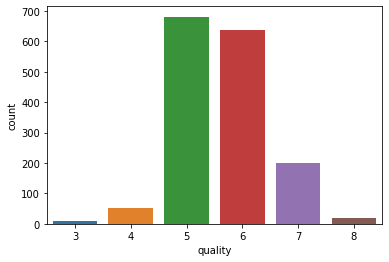

In [8]:
sns.countplot(wine_quality_data_frame['quality'])

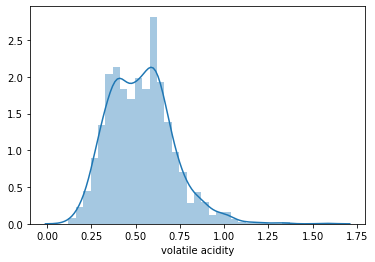

In [9]:
sns.distplot(wine_quality_data_frame['volatile acidity'])

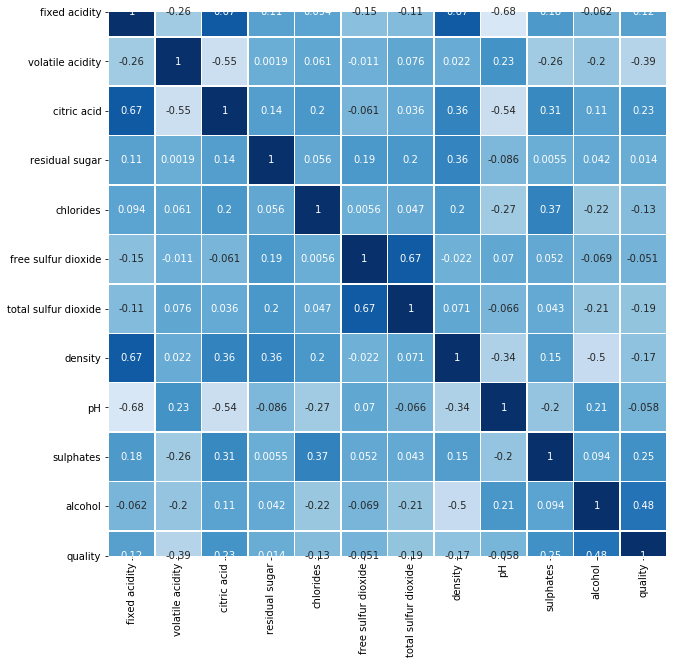

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_quality_data_frame.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Blues")
plt.show()

In [11]:
#levels of Y variable
wine_quality_data_frame['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
wine_quality_data_frame['quality'] = wine_quality_data_frame['quality'].replace(8,7)
wine_quality_data_frame['quality'] = wine_quality_data_frame['quality'].replace(3,5)
wine_quality_data_frame['quality'] = wine_quality_data_frame['quality'].replace(4,5)
wine_quality_data_frame['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [14]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_quality_data_frame.drop('quality',axis=1), wine_quality_data_frame['quality'], test_size=.20,
                                                   random_state=5)
X_train.shape,X_test.shape

((1279, 11), (320, 11))

## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [15]:
dt_entropy=DecisionTreeClassifier(criterion='entropy')

In [16]:
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Print the accuracy of the model & print the confusion matrix.

In [17]:
dt_entropy.score(X_train, y_train)  # performance on train data

1.0

In [18]:
dt_entropy.score(X_test, y_test)  # performance on test data

0.70625

#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically

In [19]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=4, min_samples_leaf=6)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       random_state=50)

In [20]:

inde_variables = wine_quality_data_frame.drop('quality', axis=1)
feature_column = inde_variables.columns

In [21]:
prediction_pruned = clf_pruned.predict(X_test)
prediction_pruned_train = clf_pruned.predict(X_train)

In [22]:
print(accuracy_score(y_test,prediction_pruned))
print(accuracy_score(y_train,prediction_pruned_train))

0.63125
0.6364347146207975


In [23]:
acc_DT = accuracy_score(y_test, prediction_pruned)

### When the tree is regularaised, overfitting is reduced, but there is no increase in accuracy

In [24]:
## Calculating feature importance

feature_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_column, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.481629
sulphates,0.266467
volatile acidity,0.100496
fixed acidity,0.089209
free sulfur dioxide,0.036360
total sulfur dioxide,0.025839
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
density,0.000000


#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [25]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.63125


### Apply the Random forest model and print the accuracy of Random forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 50)
rf_model = rf_model.fit(X_train, y_train)

In [27]:
prediction_RF = rf_model.predict(X_test)
accuracy_RF = accuracy_score(y_test, prediction_RF)

In [28]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [accuracy_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.631250
0,Random Forest,0.740625


#### Compared to the decision tree, we can see that the accuracy has significantly improved for the Random forest model

## Apply Adaboost Ensemble Algorithm 

In [29]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier( n_estimators= 150, learning_rate=0.05, random_state=5)
adaboost_classifier = adaboost_classifier.fit(X_train, y_train)

In [30]:
prediction_adaboost =adaboost_classifier.predict(X_test)
accuracy_AB = accuracy_score(y_test, prediction_adaboost)

In [31]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [accuracy_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.631250
0,Random Forest,0.740625
0,Adaboost,0.631250


### Apply Bagging Classifier Algorithm and print the accuracy.

In [32]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(n_estimators=55, max_samples= .5, bootstrap=True, oob_score=True, random_state=5)
bagging_classifier = bagging_classifier.fit(X_train, y_train)

In [33]:
prediction_bagging =bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, prediction_bagging)

In [34]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [accuracy_bagging]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.631250
0,Random Forest,0.740625
0,Adaboost,0.631250
0,Bagging,0.734375


### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoosting_classifier = GradientBoostingClassifier(n_estimators = 60, learning_rate = 0.05, random_state=5)
gradientBoosting_classifier = gradientBoosting_classifier.fit(X_train, y_train)

In [36]:
prediction_gradientBoosting =gradientBoosting_classifier.predict(X_test)
accuracy_gradientBoosting = accuracy_score(y_test, prediction_gradientBoosting)

In [37]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [accuracy_gradientBoosting]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.631250
0,Random Forest,0.740625
0,Adaboost,0.631250
0,Bagging,0.734375
0,Gradient Boost,0.662500


#### For this dataset, Random forest and bagging models give the best results on test predictions